In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [69]:
#columns name for easy access
common_header = ["YYYY","DOY","HR","MN"]
headers =  ["Timeshift","Field magnitude average(nT)","Speed(km/s)","Proton Density(n/cc)","Temperature(K)","FlowPressure(nPa)"]

#graph_label for headers(short)
graph_header = ["TimeShift","Magnetic Field","Speed","Density","Tempt","Pressure"]

common_header.extend(headers)
data_dir = 'omni_data/omni_min_2022.lst'
solar_data = pd.read_csv(data_dir, sep= '\s+', names = common_header)

In [70]:
#to remove the outliers 
#this takes the highest value(999,9999,999999) outliers from the series so before using this we should be sure our all column
# have outliers and then later remove the column not having outliers from list headers
for itm in headers:
    solar_data.replace(to_replace = solar_data[itm].max(),value = np.NaN,inplace = True)
    solar_data.fillna(method='bfill',inplace = True)

In [71]:
#for combining the YYYY,DOY,HR,MM to a datetime type for easy ploting
import datetime
time_date = []
for i in range(len(solar_data.index)):
    time_date.append(pd.to_datetime(f"{int(solar_data.iloc[i].YYYY)}{int(solar_data.iloc[i].DOY)}{int(solar_data.iloc[i].HR)}{int(solar_data.iloc[i].MN)}",format='%Y%j%H%M'))
solar_data.loc[:,'time_date'] = time_date #add new column time_date to our df

In [72]:
solar_data

,YYYY,DOY,HR,MN,Timeshift,Field magnitude average(nT),Speed(km/s),Proton Density(n/cc),Temperature(K),FlowPressure(nPa),time_date
0,2021,238,0,0,3288.0,3.76,388.6,4.35,65268.0,1.31,2021-08-26 00:00:00
1,2021,238,0,1,3270.0,3.82,386.5,4.53,77344.0,1.35,2021-08-26 00:01:00
2,2021,238,0,2,3374.0,3.82,386.0,4.57,80248.0,1.36,2021-08-26 00:02:00
3,2021,238,0,3,3322.0,3.86,385.1,5.09,82110.0,1.51,2021-08-26 00:03:00
4,2021,238,0,4,3261.0,3.83,384.8,5.00,81087.0,1.48,2021-08-26 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...
2875,2021,239,23,55,3882.0,13.36,371.9,2.25,10446.0,0.62,2021-08-27 23:55:00
2876,2021,239,23,56,3919.0,13.38,377.3,2.18,9773.0,0.62,2021-08-27 23:56:00
2877,2021,239,23,57,3949.0,13.34,377.3,2.18,9773.0,0.62,2021-08-27 23:57:00
2878,2021,239,23,58,3979.0,13.36,377.3,2.18,9773.0,0.62,2021-08-27 23:58:00


In [73]:
solar_data.describe()

,YYYY,DOY,HR,MN,Timeshift,Field magnitude average(nT),Speed(km/s),Proton Density(n/cc),Temperature(K),FlowPressure(nPa)
count,2880.0,2880.000000,2880.000000,2880.00000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,2021.0,238.500000,11.500000,29.50000,3825.017014,6.794354,387.181771,5.852642,65015.950000,1.829340
std,0.0,0.500087,6.923389,17.32111,520.530580,5.019313,15.957117,5.055332,35026.586238,1.701623
min,2021.0,238.000000,0.000000,0.00000,1235.000000,0.900000,353.400000,1.090000,7463.000000,0.290000
25%,2021.0,238.000000,5.750000,14.75000,3481.750000,2.900000,374.700000,3.520000,41543.750000,1.010000
50%,2021.0,238.500000,11.500000,29.50000,3782.500000,3.860000,386.500000,4.060000,56783.000000,1.150000
75%,2021.0,239.000000,17.250000,44.25000,4190.500000,11.812500,400.300000,8.490000,86429.250000,2.750000
max,2021.0,239.000000,23.000000,59.00000,6138.000000,16.030000,430.500000,44.330000,230840.000000,14.050000


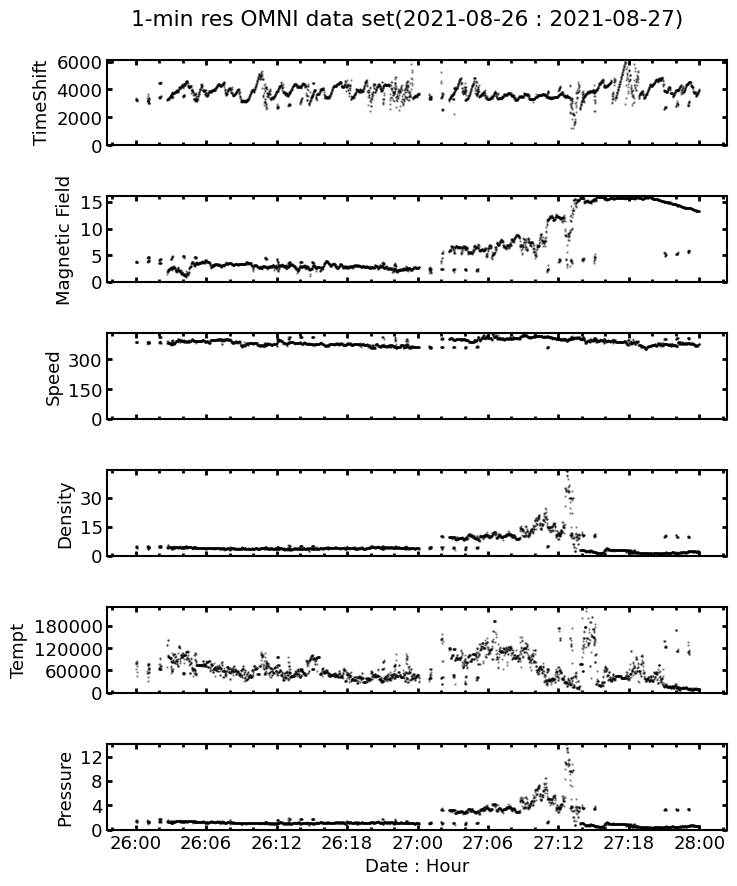

In [74]:
plt.rcParams.update({'font.family':'DejaVu Sans',"figure.facecolor":'white',"font.size":13})

fig,ax = plt.subplots(len(headers),1,figsize=(8,12),sharex = True)
fig.suptitle("1-min res OMNI data set(2021-08-26 : 2021-08-27)",y = 0.93)

fig.set_figheight(10)
fig.subplots_adjust(hspace=0.6)
#for formatting the x labels to take day and hour
myFmt = mdates.DateFormatter('%d:%H')

for i,item in enumerate(headers):
    [x.set_linewidth(1.5) for x in ax[i].spines.values()]
#     ax[i].plot(solar_data[time_date"],solar_data[item])
    ax[i].scatter(solar_data["time_date"],solar_data[item],s = 0.5, alpha = 0.4,color = 'black')
    
    #setting y limit to equals 0 to max value and label of it to equal the argument passed from graph_header
    ax[i].set_ylim([0,solar_data[item].max()])
    ax[i].set_ylabel(f"{graph_header[i]}")
    
    #setting the y axis 4 major locator to have ticks in the pos and 3 minor locator
    ax[i].yaxis.set_major_locator(plt.MaxNLocator(4))
    ax[i].xaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    ax[i].tick_params(left = True, right = True, bottom = True, top = True, direction = "in",which = "both",width = 2)
    
    if (item == headers[-1]):
        #to have labels in x-axis in format %d-%H
        ax[i].xaxis.set_major_formatter(myFmt)
        ax[i].set_xlabel("Date : Hour")
        
# directory to save the images
save_dir = 'pictures/'

# Save the figure with a specific filename and path
plt.savefig(os.path.join(save_dir, '2021.jpg'), bbox_inches='tight')
